In [17]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
huawei=pd.read_csv('huawei.csv')
honor=pd.read_csv('honor.csv')
vivo=pd.read_csv('vivo.csv')
oppo=pd.read_csv('oppo.csv')
xiaomi=pd.read_csv('xiaomi.csv')
samsung=pd.read_csv('samsung.csv')
nokia=pd.read_csv('nokia.csv')
apple=pd.read_csv('apple.csv')

In [20]:
#首先对数据集按照手机品牌进行分割，如下
huawei.head()

,id,age15,age26,age30,male,female,low,mid,high
0,TOM,8,16,9,7,14,11,9,13
1,Awareness,91,91,86,87,90,88,89,90
2,Consideration,27,37,29,27,34,28,36,29
3,Preference,8,16,14,8,17,17,13,10
4,Primary use,17,20,19,15,22,20,22,15


然后对数据的典型特征进行计算，如下，引入标准差std的概念，标准差可以衡量一个数据集的离散程度，这样理解：多个衡量指标的标准差越大，说明数据集越分散，说明测试者对某一品牌的选择并不集中，简单说他可能选择了更多其他品牌
通过下面数据发现，选择vivo以及oppo的群体不管各个属性标准差较小，是否可以说明这两个群体对品牌的选择更专一些

In [7]:

huawei.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,30.200000,36.000000,31.400000,28.800000,35.400000,32.800000,33.800000,31.400000
std,34.881227,31.945266,31.405414,33.499254,31.461087,31.459498,32.553034,33.560393
min,8.000000,16.000000,9.000000,7.000000,14.000000,11.000000,9.000000,10.000000
25%,8.000000,16.000000,14.000000,8.000000,17.000000,17.000000,13.000000,13.000000
50%,17.000000,20.000000,19.000000,15.000000,22.000000,20.000000,22.000000,15.000000
75%,27.000000,37.000000,29.000000,27.000000,34.000000,28.000000,36.000000,29.000000
max,91.000000,91.000000,86.000000,87.000000,90.000000,88.000000,89.000000,90.000000


In [8]:
honor.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,23.800000,25.200000,25.000000,24.000000,25.200000,22.600000,26.600000,25.400000
std,36.901219,36.417029,35.099858,35.979161,35.884537,35.948574,35.592134,35.697339
min,2.000000,5.000000,4.000000,4.000000,3.000000,2.000000,5.000000,2.000000
25%,4.000000,5.000000,4.000000,4.000000,5.000000,3.000000,7.000000,5.000000
50%,7.000000,5.000000,7.000000,4.000000,8.000000,5.000000,9.000000,7.000000
75%,17.000000,22.000000,24.000000,21.000000,22.000000,17.000000,23.000000,26.000000
max,89.000000,89.000000,86.000000,87.000000,88.000000,86.000000,89.000000,87.000000


In [9]:
vivo.describe()

,age15,age26,age30,male,low,mid,high
count,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,9.000000,10.400000,9.00000,10.600000,9.600000,9.000000,9.800000
std,17.406895,17.952716,13.72953,19.449936,15.469324,16.492423,15.959323
min,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.00000,0.000000,2.000000,0.000000,1.000000
50%,1.000000,1.000000,2.00000,1.000000,3.000000,0.000000,2.000000
75%,4.000000,8.000000,8.00000,7.000000,6.000000,7.000000,7.000000
max,40.000000,42.000000,33.00000,45.000000,37.000000,38.000000,38.000000


In [10]:
oppo.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.00000,5.00000,5.000000,5.00000,5.000000,5.00000,5.00000,5.0000
mean,7.20000,9.20000,7.400000,9.20000,7.000000,7.60000,8.00000,8.2000
std,12.79453,16.36154,13.794927,17.28294,11.895377,12.54193,14.19507,15.6269
min,0.00000,0.00000,0.000000,0.00000,0.000000,1.00000,0.00000,0.0000
25%,1.00000,0.00000,1.000000,1.00000,1.000000,2.00000,0.00000,0.0000
50%,2.00000,1.00000,1.000000,1.00000,1.000000,2.00000,1.00000,1.0000
75%,3.00000,7.00000,3.000000,4.00000,5.000000,3.00000,6.00000,4.0000
max,30.00000,38.00000,32.000000,40.00000,28.000000,30.00000,33.00000,36.0000


In [11]:
xiaomi.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.00000
mean,29.200000,36.200000,33.600000,39.20000,28.400000,31.40000,32.200000,36.40000
std,32.197826,30.449959,28.271894,28.67403,30.980639,29.39898,30.556505,29.61925
min,8.000000,12.000000,11.000000,17.00000,5.000000,11.00000,9.000000,11.00000
25%,9.000000,20.000000,20.000000,23.00000,13.000000,18.00000,14.000000,21.00000
50%,16.000000,23.000000,21.000000,27.00000,15.000000,18.00000,19.000000,24.00000
75%,28.000000,38.000000,34.000000,41.00000,27.000000,27.00000,35.000000,40.00000
max,85.000000,88.000000,82.000000,88.00000,82.000000,83.00000,84.000000,86.00000


In [12]:
samsung.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.00000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,50.80000,43.40000,50.000000,49.200000,47.400000,49.000000,51.000000,44.200000
std,26.26214,31.05318,28.521921,28.243583,29.048236,28.151377,26.105555,31.791508
min,34.00000,25.00000,25.000000,28.000000,28.000000,29.000000,33.000000,19.000000
25%,38.00000,25.00000,30.000000,30.000000,29.000000,32.000000,33.000000,26.000000
50%,38.00000,30.00000,46.000000,40.000000,38.000000,41.000000,44.000000,31.000000
75%,47.00000,39.00000,52.000000,51.000000,44.000000,45.000000,49.000000,47.000000
max,97.00000,98.00000,97.000000,97.000000,98.000000,98.000000,96.000000,98.000000


In [13]:
nokia.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,19.200000,19.200000,23.000000,20.400000,21.400000,21.000000,21.200000,20.400000
std,36.840195,37.405882,38.255719,36.246379,38.461669,38.091994,36.989188,36.814399
min,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000
25%,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,2.000000,6.000000,5.000000,4.000000,4.000000,5.000000,4.000000
75%,6.000000,6.000000,13.000000,9.000000,9.000000,8.000000,11.000000,9.000000
max,85.000000,86.000000,91.000000,85.000000,90.000000,89.000000,87.000000,86.000000


In [14]:
apple.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,42.200000,36.400000,30.200000,27.200000,41.000000,34.000000,31.400000,41.600000
std,31.003226,31.516662,32.197826,32.645061,31.168895,33.369147,33.313661,28.649607
min,14.000000,12.000000,9.000000,6.000000,15.000000,8.000000,9.000000,18.000000
25%,25.000000,21.000000,15.000000,12.000000,25.000000,17.000000,16.000000,26.000000
50%,34.000000,24.000000,16.000000,14.000000,29.000000,24.000000,16.000000,30.000000
75%,44.000000,34.000000,24.000000,19.000000,42.000000,29.000000,26.000000,44.000000
max,94.000000,91.000000,87.000000,85.000000,94.000000,92.000000,90.000000,90.000000


下面做了一个属性之间相关性的测试，发现属性间正相关性极强，基本都在0.99以上，所以分析属性之间的相关性意义不大，
缘由可能是样本容量太小

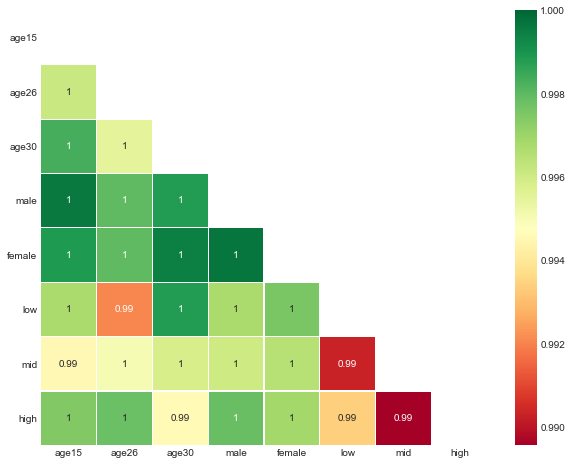

In [15]:
#测试化为
# Compute the correlation matrix 
corr_all = huawei.corr()

# Generate a mask for the upper triangle
#构造一个蒙版布尔型，同corr_all一致的零矩阵，然后从中取上三角矩阵。去下三角矩阵是np.tril_indices_from(mask)
#其目的是剔除冗余映射，只取一半就好
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask = mask,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

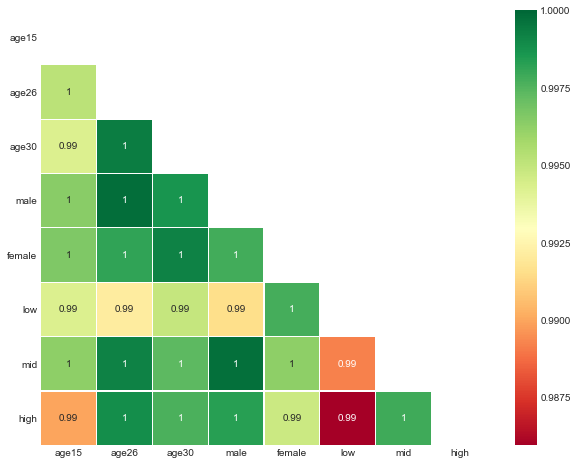

In [21]:
#测试小米
# Compute the correlation matrix 
corr_all = xiaomi.corr()

# Generate a mask for the upper triangle
#构造一个蒙版布尔型，同corr_all一致的零矩阵，然后从中取上三角矩阵。去下三角矩阵是np.tril_indices_from(mask)
#其目的是剔除冗余映射，只取一半就好
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask = mask,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

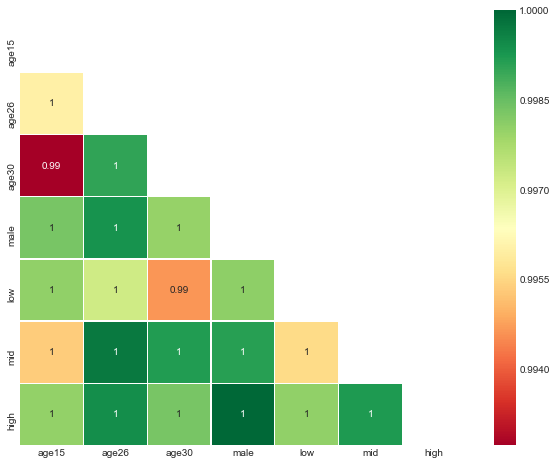

In [22]:
#测试vivo
# Compute the correlation matrix 
corr_all = vivo.corr()

# Generate a mask for the upper triangle
#构造一个蒙版布尔型，同corr_all一致的零矩阵，然后从中取上三角矩阵。去下三角矩阵是np.tril_indices_from(mask)
#其目的是剔除冗余映射，只取一半就好
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask = mask,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

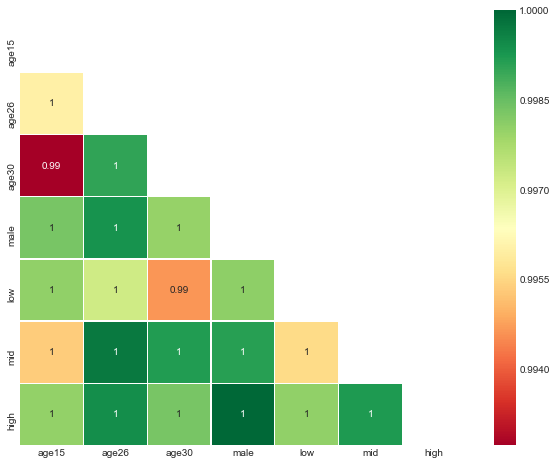

In [23]:
#测试apple
# Compute the correlation matrix 
corr_all = vivo.corr()

# Generate a mask for the upper triangle
#构造一个蒙版布尔型，同corr_all一致的零矩阵，然后从中取上三角矩阵。去下三角矩阵是np.tril_indices_from(mask)
#其目的是剔除冗余映射，只取一半就好
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask = mask,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

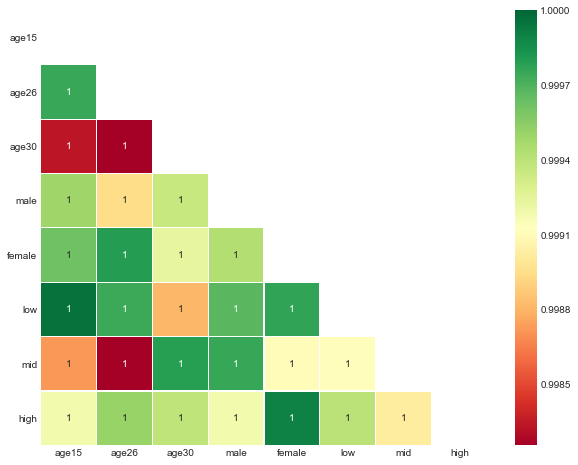

In [24]:
#测试nokia
# Compute the correlation matrix 
corr_all = nokia.corr()

# Generate a mask for the upper triangle
#构造一个蒙版布尔型，同corr_all一致的零矩阵，然后从中取上三角矩阵。去下三角矩阵是np.tril_indices_from(mask)
#其目的是剔除冗余映射，只取一半就好
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask = mask,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

另一方面，关于awareness这一评估标准，比如说我知道vivo oppo品牌，但是我不会买，所以说是不是对购买的影响了不是那么大
所以以下对这一标准删除做了测试。仍然是vivo oppo两个品牌的标准差相当低，用户比较专一，小米相对较高些，感觉用户是不是没那么专一

In [37]:
huawei1=pd.read_csv('huawei.csv')
honor1=pd.read_csv('honor.csv')
vivo1=pd.read_csv('vivo.csv')
oppo1=pd.read_csv('oppo.csv')
xiaomi1=pd.read_csv('xiaomi.csv')
samsung1=pd.read_csv('samsung.csv')
nokia1=pd.read_csv('nokia.csv')
apple1=pd.read_csv('apple.csv')

In [38]:
huawei1=huawei1.drop([1])
honor1=honor1.drop([1])
vivo1=vivo1.drop([1])
oppo1=oppo1.drop([1])
samsung1=samsung1.drop([1])
nokia1=nokia1.drop([1])
apple1=apple1.drop([1])

In [39]:
huawei1.head()

,id,age15,age26,age30,male,female,low,mid,high
0,TOM,8,16,9,7,14,11,9,13
2,Consideration,27,37,29,27,34,28,36,29
3,Preference,8,16,14,8,17,17,13,10
4,Primary use,17,20,19,15,22,20,22,15


In [40]:
huawei1.describe()

,age15,age26,age30,male,female,low,mid,high
count,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.00000,4.000000
mean,15.000000,22.250000,17.750000,14.250000,21.75000,19.000000,20.00000,16.750000
std,9.055385,10.012492,8.539126,9.215024,8.80814,7.071068,11.97219,8.421203
min,8.000000,16.000000,9.000000,7.000000,14.00000,11.000000,9.00000,10.000000
25%,8.000000,16.000000,12.750000,7.750000,16.25000,15.500000,12.00000,12.250000
50%,12.500000,18.000000,16.500000,11.500000,19.50000,18.500000,17.50000,14.000000
75%,19.500000,24.250000,21.500000,18.000000,25.00000,22.000000,25.50000,18.500000
max,27.000000,37.000000,29.000000,27.000000,34.00000,28.000000,36.00000,29.000000


In [41]:
honor1.describe()

,age15,age26,age30,male,female,low,mid,high
count,4.000000,4.00,4.000000,4.00,4.000000,4.000000,4.000000,4.00000
mean,7.500000,9.25,9.750000,8.25,9.500000,6.750000,11.000000,10.00000
std,6.658328,8.50,9.604686,8.50,8.582929,6.946222,8.164966,10.86278
min,2.000000,5.00,4.000000,4.00,3.000000,2.000000,5.000000,2.00000
25%,3.500000,5.00,4.000000,4.00,4.500000,2.750000,6.500000,4.25000
50%,5.500000,5.00,5.500000,4.00,6.500000,4.000000,8.000000,6.00000
75%,9.500000,9.25,11.250000,8.25,11.500000,8.000000,12.500000,11.75000
max,17.000000,22.00,24.000000,21.00,22.000000,17.000000,23.000000,26.00000


In [42]:
vivo1.describe()

,age15,age26,age30,male,low,mid,high
count,4.000000,4.000000,4.000000,4.000000,4.00,4.00,4.000000
mean,1.250000,2.500000,3.000000,2.000000,2.75,1.75,2.750000
std,1.892969,3.696846,3.366502,3.366502,2.50,3.50,2.872281
min,0.000000,0.000000,1.000000,0.000000,0.00,0.00,1.000000
25%,0.000000,0.750000,1.000000,0.000000,1.50,0.00,1.000000
50%,0.500000,1.000000,1.500000,0.500000,2.50,0.00,1.500000
75%,1.750000,2.750000,3.500000,2.500000,3.75,1.75,3.250000
max,4.000000,8.000000,8.000000,7.000000,6.00,7.00,7.000000


In [43]:
oppo1.describe()

,age15,age26,age30,male,female,low,mid,high
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.500000,2.000000,1.250000,1.500000,1.750000,2.000000,1.750000,1.250000
std,1.290994,3.366502,1.258306,1.732051,2.217356,0.816497,2.872281,1.892969
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.750000,0.000000,0.750000,0.750000,0.750000,1.750000,0.000000,0.000000
50%,1.500000,0.500000,1.000000,1.000000,1.000000,2.000000,0.500000,0.500000
75%,2.250000,2.500000,1.500000,1.750000,2.000000,2.250000,2.250000,1.750000
max,3.000000,7.000000,3.000000,4.000000,5.000000,3.000000,6.000000,4.000000


In [44]:
xiaomi1.describe()

,age15,age26,age30,male,female,low,mid,high
count,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.00000
mean,29.200000,36.200000,33.600000,39.20000,28.400000,31.40000,32.200000,36.40000
std,32.197826,30.449959,28.271894,28.67403,30.980639,29.39898,30.556505,29.61925
min,8.000000,12.000000,11.000000,17.00000,5.000000,11.00000,9.000000,11.00000
25%,9.000000,20.000000,20.000000,23.00000,13.000000,18.00000,14.000000,21.00000
50%,16.000000,23.000000,21.000000,27.00000,15.000000,18.00000,19.000000,24.00000
75%,28.000000,38.000000,34.000000,41.00000,27.000000,27.00000,35.000000,40.00000
max,85.000000,88.000000,82.000000,88.00000,82.000000,83.00000,84.000000,86.00000


In [45]:
samsung1.describe()

,age15,age26,age30,male,female,low,mid,high
count,4.00,4.000000,4.000000,4.000000,4.000000,4.00,4.000000,4.000000
mean,39.25,29.750000,38.250000,37.250000,34.750000,36.75,39.750000,30.750000
std,5.50,6.601767,12.816006,10.563301,7.632169,7.50,8.057088,11.898879
min,34.00,25.000000,25.000000,28.000000,28.000000,29.00,33.000000,19.000000
25%,37.00,25.000000,28.750000,29.500000,28.750000,31.25,33.000000,24.250000
50%,38.00,27.500000,38.000000,35.000000,33.500000,36.50,38.500000,28.500000
75%,40.25,32.250000,47.500000,42.750000,39.500000,42.00,45.250000,35.000000
max,47.00,39.000000,52.000000,51.000000,44.000000,45.00,49.000000,47.000000


In [46]:
apple1.describe()

,age15,age26,age30,male,female,low,mid,high
count,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,29.25000,22.750000,16.000000,12.750000,27.750000,19.500000,16.750000,29.500000
std,12.78997,9.069179,6.164414,5.377422,11.176612,9.110434,6.994045,10.878113
min,14.00000,12.000000,9.000000,6.000000,15.000000,8.000000,9.000000,18.000000
25%,22.25000,18.750000,13.500000,10.500000,22.500000,14.750000,14.250000,24.000000
50%,29.50000,22.500000,15.500000,13.000000,27.000000,20.500000,16.000000,28.000000
75%,36.50000,26.500000,18.000000,15.250000,32.250000,25.250000,18.500000,33.500000
max,44.00000,34.000000,24.000000,19.000000,42.000000,29.000000,26.000000,44.000000


In [47]:
nokia1.describe()

,age15,age26,age30,male,female,low,mid,high
count,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.00,4.000000
mean,2.750000,2.500000,6.000000,4.250000,4.25000,4.000000,4.75,4.000000
std,2.362908,2.516611,4.966555,3.593976,3.40343,2.828427,4.50,3.741657
min,1.000000,0.000000,2.000000,1.000000,1.00000,2.000000,1.00,0.000000
25%,1.000000,1.500000,2.750000,1.750000,2.50000,2.000000,1.75,2.250000
50%,2.000000,2.000000,4.500000,3.500000,3.50000,3.000000,3.50,3.500000
75%,3.750000,3.000000,7.750000,6.000000,5.25000,5.000000,6.50,5.250000
max,6.000000,6.000000,13.000000,9.000000,9.00000,8.000000,11.00,9.000000


In [ ]:
相关性测试同样感觉意义不大

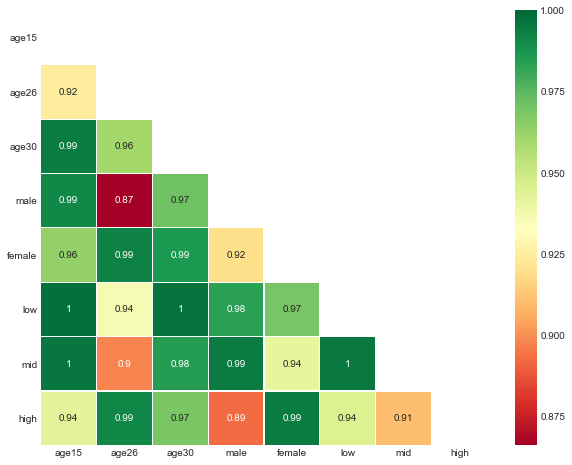

In [48]:
#测试nokia
# Compute the correlation matrix 
corr_all = nokia1.corr()

# Generate a mask for the upper triangle
#构造一个蒙版布尔型，同corr_all一致的零矩阵，然后从中取上三角矩阵。去下三角矩阵是np.tril_indices_from(mask)
#其目的是剔除冗余映射，只取一半就好
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_all, mask = mask,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()